In [1]:
import pandas as pd

# Load the datasets
df_class = pd.read_csv("MC_3005_classifications.csv")
df_site = pd.read_csv("MC_3005_site_classifications.csv")

In [3]:
# Overview of structure
print(df_class.info())
print(df_site.info())

# Missing values
print(df_class.isnull().sum())
print(df_site.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30408 entries, 0 to 30407
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   River Basin District            30408 non-null  object 
 1   Management Catchment            30408 non-null  object 
 2   Operational Catchment           30408 non-null  object 
 3   Water Body ID                   30408 non-null  object 
 4   Water Body                      30408 non-null  object 
 5   Water Body Type                 30408 non-null  object 
 6   Easting                         30408 non-null  int64  
 7   Northing                        30408 non-null  int64  
 8   Ngr                             30408 non-null  object 
 9   Hydromorphological designation  30408 non-null  object 
 10  Year                            30408 non-null  int64  
 11  Status                          30408 non-null  object 
 12  Cycle                           

In [5]:
# Summary for numerical and categorical data
print(df_class.describe(include='all'))
print(df_site.describe(include='all'))

       River Basin District                     Management Catchment  \
count                 30408                                    30408   
unique                    1                                        1   
top                  Severn  Avon Bristol and Somerset North Streams   
freq                  30408                                    30408   
mean                    NaN                                      NaN   
std                     NaN                                      NaN   
min                     NaN                                      NaN   
25%                     NaN                                      NaN   
50%                     NaN                                      NaN   
75%                     NaN                                      NaN   
max                     NaN                                      NaN   

       Operational Catchment   Water Body ID  \
count                  30408           30408   
unique                     4           

In [7]:
# Unique classification items and statuses
print(df_class['Classification Item'].value_counts())
print(df_class['Status'].value_counts())

# Yearly distribution
print(df_class['Year'].value_counts().sort_index())

Classification Item
Chemical                                1300
Priority hazardous substances           1300
Priority substances                     1300
Other Pollutants                        1300
Ecological                              1293
                                        ... 
Phenol                                     4
Permethrin                                 3
Other Substances                           3
Anthracene                                 2
Di(2-ethylhexyl)phthalate (Priority)       1
Name: count, Length: 97, dtype: int64
Status
High                           8511
Good                           7389
Moderate                       4729
Does not require assessment    3569
Supports Good                  3006
Poor                           1659
Fail                           1013
Does Not Support Good           215
Moderate or less                209
Bad                             108
Name: count, dtype: int64
Year
2009    1865
2010    1803
2011    1743
2012    17

In [9]:
# Check coordinate ranges
print(df_class[['Easting', 'Northing']].describe())
print(df_site[['Site Easting', 'Site Northing']].describe())

             Easting       Northing
count   30408.000000   30408.000000
mean   377179.883616  169452.575013
std     16379.464094   13436.858810
min    337745.000000  142139.000000
25%    366123.000000  158422.000000
50%    378536.000000  170020.000000
75%    389798.000000  180238.000000
max    402312.000000  197633.000000
        Site Easting  Site Northing
count   10645.000000   10645.000000
mean   377832.149178  169667.883701
std     16338.352998   13510.748179
min    336283.000000  142360.000000
25%    366766.000000  159431.000000
50%    378855.000000  169702.000000
75%    391918.000000  181275.000000
max    407335.000000  199426.000000


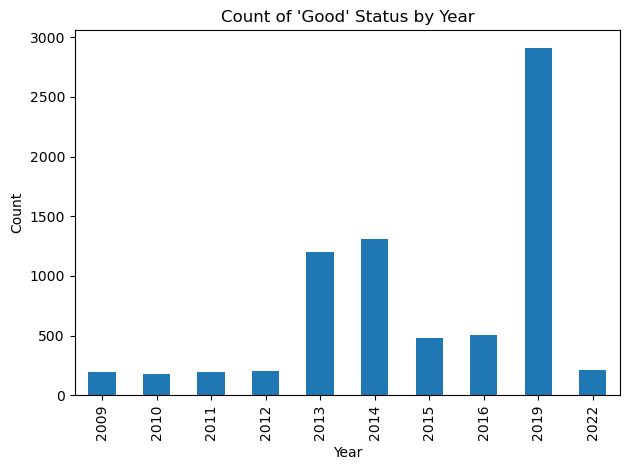

In [11]:
import matplotlib.pyplot as plt

# Example: Trend of 'Good' status over time
df_class[df_class['Status'] == 'Good'].groupby('Year').size().plot(kind='bar')
plt.title("Count of 'Good' Status by Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

R-squared: 0.9677141758593891
RMSE: 0.08019998022928047


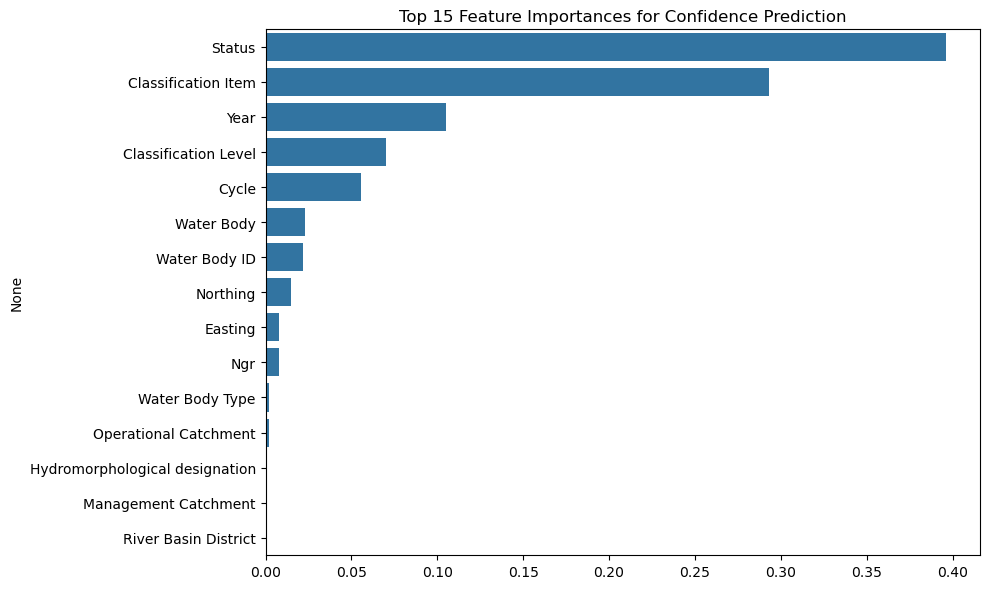

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("MC_3005_classifications.csv")

# Drop rows with missing target
df = df.dropna(subset=['Confidence'])

# Select features and target
X = df.drop(columns=['Confidence', 'Certainty', 'Deterioration Type', 'Linked Reasons', 'Investigation Outcome'])
y = df['Confidence']

# Drop mostly-missing columns
X = X.drop(columns=[col for col in X.columns if X[col].isnull().mean() > 0.5 or X[col].nunique() == len(X)])

# Fill missing values
X = X.fillna('Unknown')

# Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances for Confidence Prediction")
plt.tight_layout()
plt.show()

XGBoost R2: 0.9494920157746988
XGBoost RMSE: 0.10031094940743648
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 13897, number of used features: 13
[LightGBM] [Info] Start training from score 0.561821
LightGBM R2: 0.918771942422052
LightGBM RMSE: 0.1272100305135217


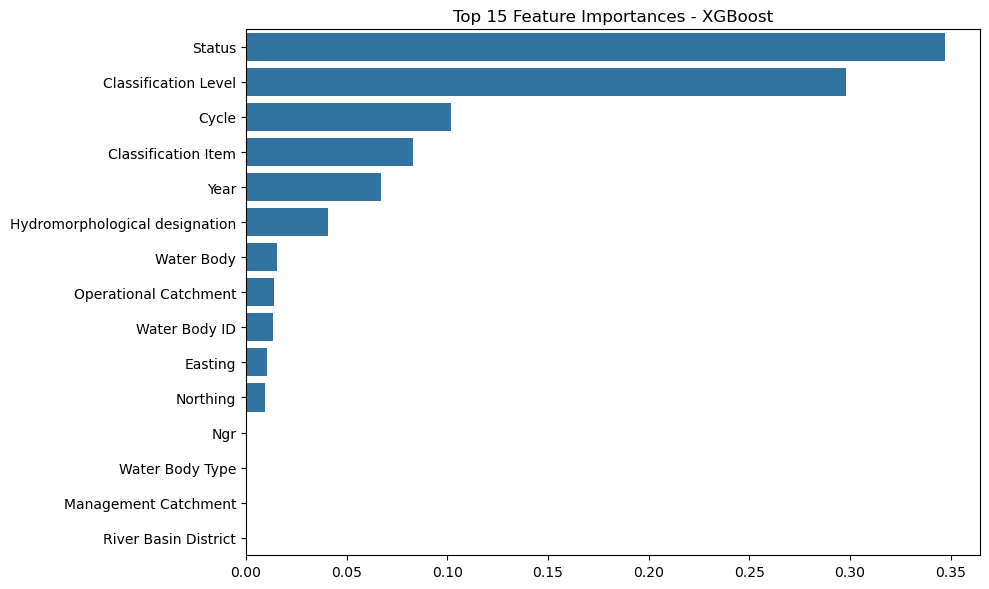

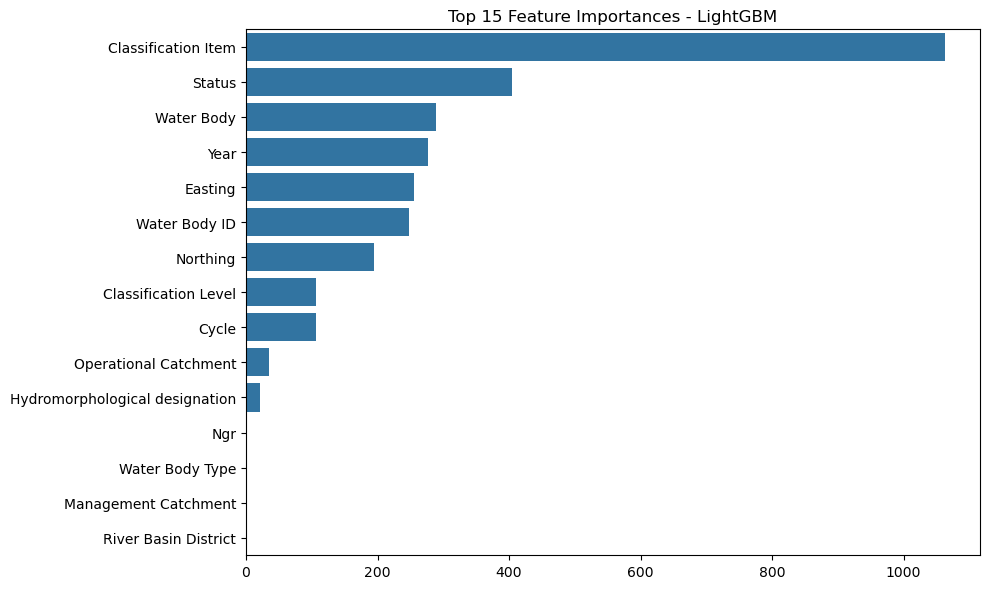

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

df = df.dropna(subset=['Confidence'])

# Prepare features
X = df.drop(columns=['Confidence', 'Certainty', 'Deterioration Type', 'Linked Reasons', 'Investigation Outcome'])
X = X.drop(columns=[col for col in X.columns if X[col].isnull().mean() > 0.5 or X[col].nunique() == len(X)])
X = X.fillna('Unknown')

# Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y = df['Confidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost R2:", r2_score(y_test, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Train LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM R2:", r2_score(y_test, lgb_pred))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, lgb_pred)))

# Plot feature importance
def plot_feature_importance(model, name, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:15]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(features)[indices])
    plt.title(f"Top 15 Feature Importances - {name}")
    plt.tight_layout()
    plt.show()

plot_feature_importance(xgb_model, "XGBoost", X.columns)
plot_feature_importance(lgb_model, "LightGBM", X.columns)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("MC_3005_classifications.csv")

# Check frequency of each status
print(df['Status'].value_counts())

# If you have other columns (like rainfall, level, etc.)
# Plot average of those by status
for col in ['rainfall', 'water_level', 'turbidity']:  # adjust as needed
    if col in df.columns:
        sns.boxplot(x='Status', y=col, data=df)
        plt.title(f"{col} distribution by status")
        plt.xticks(rotation=45)
        plt.show()

Status
High                           8511
Good                           7389
Moderate                       4729
Does not require assessment    3569
Supports Good                  3006
Poor                           1659
Fail                           1013
Does Not Support Good           215
Moderate or less                209
Bad                             108
Name: count, dtype: int64


In [22]:
# Step 1: Load the dataset
df = pd.read_csv("MC_3005_classifications.csv")

# Step 2: Define status-to-risk mapping
status_to_risk = {
    'Fail': 2,
    'Poor': 2,
    'Bad': 2,
    'Does Not Support Good': 2,
    
    'Moderate': 1,
    'Moderate or less': 1,
    
    'Good': 0,
    'Supports Good': 0,
    'High': 0,
    'Does not require assessment': 0,
}

# Step 3: Apply risk mapping
df['risk_level'] = df['Status'].map(status_to_risk)

# Step 4: Drop rows with missing risk_level or essential features
df_cleaned = df.dropna(subset=['risk_level'])

# Step 5: Save cleaned data for modeling
df_cleaned.to_csv("cleaned_bristol_data.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_bristol_data.csv'")

✅ Cleaned dataset saved as 'cleaned_bristol_data.csv'


Index(['River Basin District', 'Management Catchment', 'Operational Catchment',
       'Water Body ID', 'Water Body', 'Water Body Type', 'Easting', 'Northing',
       'Ngr', 'Hydromorphological designation', 'Year', 'Status', 'Cycle',
       'Classification Level', 'Classification Item', 'Classification ID',
       'Certainty', 'Confidence', 'Deterioration Type', 'Linked Reasons',
       'Investigation Outcome', 'risk_level'],
      dtype='object')
risk_level
0    13964
2    11506
1     4938
Name: count, dtype: int64

📊 Confusion Matrix:
[[1040   47  185]
 [ 119  186  108]
 [ 396   37 1357]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1272
           1       0.69      0.45      0.54       413
           2       0.82      0.76      0.79      1790

    accuracy                           0.74      3475
   macro avg       0.73      0.68      0.69      3475
weighted avg       0.75      0.74      0.74      

📊 Confusion Matrix:
[[2310  209  277]
 [ 628  241  119]
 [ 824   87 1387]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.83      0.70      2796
           1       0.45      0.24      0.32       988
           2       0.78      0.60      0.68      2298

    accuracy                           0.65      6082
   macro avg       0.61      0.56      0.57      6082
weighted avg       0.65      0.65      0.63      6082

✅ Accuracy: 0.6474843801381125
